combine small txt files with metrics to long table

In [18]:
import pandas as pd
#from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

#import os
#os.chdir('E:/Master-thesis/7. source code/LiClipse/tspmean/src')
#import viz

metrics_dir='E:/Master-thesis/output/evaluation/metrics/data/'
metrics_file='metrics_data.csv'

#all files in the dir
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(metrics_dir) if isfile(join(metrics_dir, f))]

print onlyfiles

if metrics_file in onlyfiles:
    onlyfiles.remove(metrics_file)
      
df_list=[]
    
for filename in onlyfiles:

    df=pd.read_csv(metrics_dir+filename,delimiter=',',header=0)
    df_list.append(df)

df_full=pd.concat(df_list,axis=0)

#print df_full
df_full.drop('parameter',axis=1,inplace=True)
df_full.reset_index(inplace=True)
df_full.drop('index',axis=1,inplace=True)
#print df_full
#df_em=df_full.loc[(df_full.ordering=='EM') | (df_full.ordering=='EMmanhattan')]
#df = df.drop(df[<some boolean condition>].index)
df_full.drop(df_full[df_full.ordering=='original'].index,inplace=True)
df_full.drop(df_full[df_full.metric=='path_length_manhattan'].index,inplace=True)
df_full['ratio']=0
df_full['rank']=0
ordering_methods=df_full.ordering.unique()
datasets=df_full.dataset.unique()

for dataset in datasets:
    #loc metrics for this dataset
    df_dataset=df_full.loc[df_full.dataset==dataset]
    metrics=df_dataset.metric.unique()
    for metric in metrics:
        #find all rows
        data=df_dataset.loc[df_dataset.metric==metric]
        base=data.loc[data.ordering=='random','value'].values[0]
        data.sort_values(by='value',inplace=True)
        #print data
        #print base
        rank=1
        for index,row in data.iterrows():
            df_full.loc[index,'ratio']=df_full.loc[index,'value']/base
            df_full.loc[index,'rank']=rank
            rank+=1
            
df_full

['aaup_data.txt', 'abalone_data.txt', 'alon_data.txt', 'auto_data.txt', 'bike_data.txt', 'cars_data.txt', 'community_data.txt', 'golub_data.txt', 'income_data.txt', 'iris_data.txt', 'magic_data.txt', 'noisy_wave_data.txt', 'olive_data.txt', 'parkinson_data.txt', 'subway_data.txt', 'traffic_data.txt', 'waveform_data.txt', 'wdbc_data.txt', 'wine_data.txt', 'yeast_data.txt']


C:\Users\khamidova\Anaconda2\lib\site-packages\ipykernel\__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,dataset,ordering,metric,value,ratio,rank
0,aaup,TSNE,neumann_stress,69401.353398,0.701567,6
1,aaup,TSNE,path_length_euclidian,233011.441345,0.340521,6
3,aaup,TSNE,fom,0.323276,0.553097,6
4,aaup,random,neumann_stress,98923.285784,1.000000,8
5,aaup,random,path_length_euclidian,684278.609171,1.000000,8
7,aaup,random,fom,0.584483,1.000000,8
12,aaup,TSPmeans,neumann_stress,55921.220762,0.565299,2
13,aaup,TSPmeans,path_length_euclidian,90500.594779,0.132257,2
15,aaup,TSPmeans,fom,0.242241,0.414454,3
16,aaup,EM,neumann_stress,56938.481688,0.575582,5


Pivot table:
Metrics as columns, datasets and ordering as rows
Save table to Excel sheet

In [22]:
import numpy as np
#change names
df_full.loc[df_full['ordering']=='EM','ordering']='EM-euc'
df_full.loc[df_full['ordering']=='EMmanhattan','ordering']='EM-man'
df_full.loc[df_full['ordering']=='HColo','ordering']='HC-olo'
df_full.loc[df_full['ordering']=='TSPmeans','ordering']='TSP-means'
df_full.loc[df_full['metric']=='fom','metric']='FOM'
df_full.loc[df_full['metric']=='neumann_stress','metric']='Stress'
df_full.loc[df_full['metric']=='path_length_euclidian','metric']='L'
df_full.loc[df_full['metric']=='path_length_manhattan','metric']='LM'

#df_full['ratio']=df_full['ratio'].apply(lambda x: np.round(x, decimals=3))
df_full.loc[:,'value']=df_full['value'].apply(lambda x: np.round(x, decimals=3))
df_full.loc[df_full['value']>1000,'value']=df_full['value'].apply(lambda x: np.round(x, decimals=0))
#print df_full
data=pd.pivot_table(df_full,values='value',index=['dataset','metric'],columns='ordering')
#tmp = data.select_dtypes(include=[np.number])
#data.loc[:, tmp.columns] = np.round(tmp,3)
writer=pd.ExcelWriter('data.xlsx')
data.to_excel(writer)
writer.close()
data

ordering                 EM-euc        EM-man        HC-olo            LK  \
dataset    metric                                                           
aaup       FOM     2.530000e-01  2.540000e-01  2.390000e-01  2.400000e-01   
           L       9.909700e+04  9.617100e+04  9.333000e+04  8.507100e+04   
           Stress  5.693800e+04  5.664800e+04  5.646800e+04  5.554600e+04   
abalone    FOM     8.270000e-01  8.110000e-01  8.040000e-01  8.230000e-01   
           L       9.341900e+01  9.117600e+01  8.396800e+01  7.582000e+01   
           Stress  1.005570e+02  1.001620e+02  9.965900e+01  9.918600e+01   
alon       FOM     3.440000e-01  3.770000e-01  2.300000e-01  4.100000e-01   
           L       1.160910e+06  1.214873e+06  1.058099e+06  1.437041e+06   
           Stress  7.440620e+05  7.621370e+05  7.057980e+05  8.227190e+05   
auto       FOM     4.140000e-01  3.230000e-01  7.120000e-01  6.970000e-01   
           L       4.508160e+05  4.433150e+05  1.385870e+05  1.310220e+05   
           Stress  7.611440e+05  7.734030e+05  6.861200e+05  7.403930e+05   
bike       L       7.955410e+05  7.054620e+05           NaN           NaN   
           Stress  6.858900e+04  6.729000e+04           NaN           NaN   
cars       L       7.228200e+04  6.481400e+04  1.470500e+04  1.147500e+04   
           Stress  1.780400e+05  1.771130e+05  1.696020e+05  1.696760e+05   
community  L       4.511000e+03  7.065000e+03  2.899000e+03  2.763000e+03   
           Stress  8.513520e+02  9.913480e+02  7.607890e+02  7.529290e+02   
golub      FOM     1.550000e-01  3.240000e-01  1.410000e-01  9.900000e-02   
           L       1.014000e+03  1.090000e+03  1.012000e+03  9.925640e+02   
           Stress  9.339500e+02  9.573790e+02  9.295120e+02  9.276250e+02   
income     L       3.858620e+05  3.882330e+05  1.184900e+05  1.148840e+05   
           Stress  2.642590e+05  2.655590e+05  1.910040e+05  2.290650e+05   
iris       FOM     8.100000e-02  9.400000e-02  6.700000e-02  8.100000e-02   
           L       5.732400e+01  5.800400e+01  5.722200e+01  5.155000e+01   
           Stress  1.234840e+02  1.233990e+02  1.219680e+02  1.223080e+02   
magic      FOM     2.080000e-01  2.060000e-01           NaN           NaN   
           L       7.501610e+05  8.047790e+05           NaN           NaN   
           Stress  7.558300e+04  7.698100e+04           NaN           NaN   
noisy_wave FOM     2.180000e-01  2.180000e-01  1.820000e-01  2.380000e-01   
           L       3.578500e+04  3.625300e+04  3.480100e+04  3.326400e+04   
           Stress  2.324000e+03  2.338000e+03  2.299000e+03  2.251000e+03   
olive      FOM     7.500000e-02  9.600000e-02  7.500000e-02  7.200000e-02   
           L       7.120000e+03  7.405000e+03  6.822000e+03  6.290000e+03   
           Stress  4.265000e+03  4.297000e+03  4.229000e+03  4.149000e+03   
parkinson  FOM     1.340000e-01  1.190000e-01  1.650000e-01  1.860000e-01   
           L       1.152100e+04  1.130600e+04  3.232000e+03  2.859000e+03   
           Stress  8.578000e+03  8.656000e+03  6.291000e+03  6.383000e+03   
subway     L       4.818430e+09  4.588174e+09  4.377836e+09  8.461654e+09   
           Stress  1.131929e+09  1.290805e+09  1.075055e+09  2.592634e+09   
traffic    L       4.152180e+05  4.439320e+05  4.088020e+05  4.723430e+05   
           Stress  3.327700e+04  3.449200e+04  3.303800e+04  3.544600e+04   
waveform   FOM     2.170000e-01  2.150000e-01  2.170000e-01  2.110000e-01   
           L       2.325500e+04  2.360800e+04  2.206500e+04  2.083500e+04   
           Stress  1.643000e+03  1.654000e+03  1.614000e+03  1.573000e+03   
wdbc       FOM     6.300000e-02  4.900000e-02  9.300000e-02  8.800000e-02   
           L       6.184200e+04  5.378000e+04  3.057700e+04  2.396100e+04   
           Stress  9.135500e+04  9.001600e+04  8.789400e+04  8.750600e+04   
wine       FOM     6.200000e-02  4.000000e-02  2.820000e-01  2.660000e-01   
           L       2.463500e+04  2.192500e+04  4.287000e+03  3.527000e+03

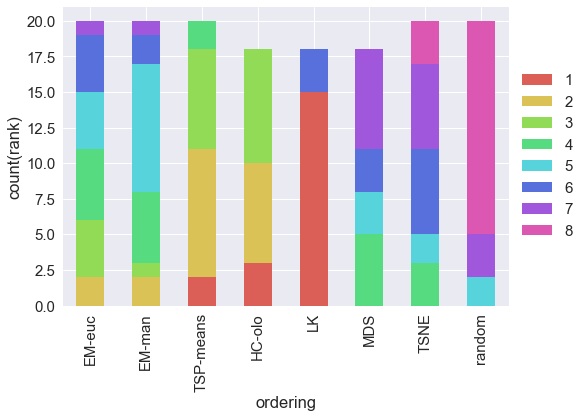

rank   ordering     1    2    3    4    5    6    7     8
0        EM-euc   NaN  2.0  4.0  5.0  4.0  4.0  1.0   NaN
1        EM-man   NaN  2.0  1.0  5.0  9.0  2.0  1.0   NaN
2        HC-olo   3.0  7.0  8.0  NaN  NaN  NaN  NaN   NaN
3            LK  15.0  NaN  NaN  NaN  NaN  3.0  NaN   NaN
4           MDS   NaN  NaN  NaN  5.0  3.0  3.0  7.0   NaN
5          TSNE   NaN  NaN  NaN  3.0  2.0  6.0  6.0   3.0
6     TSP-means   2.0  9.0  7.0  2.0  NaN  NaN  NaN   NaN
7        random   NaN  NaN  NaN  NaN  2.0  NaN  3.0  15.0


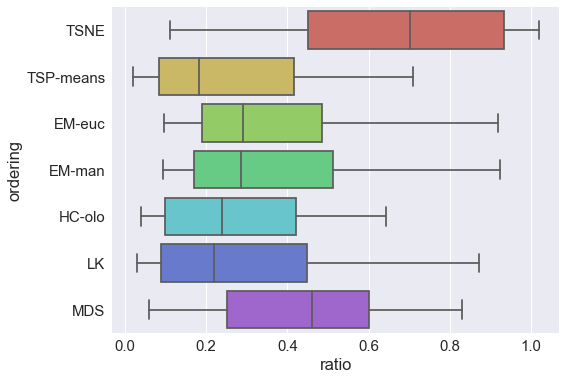

In [23]:
import seaborn as sns
sns.set(font_scale=1.5)
#sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set_palette(sns.color_palette("hls", 8))
#sns.set_palette(sns.color_palette("husl", 8))

df_full.loc[df_full['ordering']=='EM','ordering']='EM-euc'
df_full.loc[df_full['ordering']=='EMmanhattan','ordering']='EM-man'
df_full.loc[df_full['ordering']=='HColo','ordering']='HC-olo'
df_full.loc[df_full['ordering']=='TSPmeans','ordering']='TSP-means'

orderings = ['EM-euc', 'EM-man', 'TSP-means', 'HC-olo', 'LK', 'MDS', 'TSNE','random']
mapping = {ordering: i for i, ordering in enumerate(orderings)}

sns.plt.clf()
#sns.plt.cla()
data_plot=df_full.copy()
data_plot=data_plot.loc[data_plot.metric=='path_length_euclidian']
#print data_plot

#print data_plot
data_places=data_plot[['ordering','rank','value']]
data_places=pd.pivot_table(data_places,values='value',index=['ordering'],columns=['rank'],aggfunc='count')
data_places.reset_index(inplace=True)

#data_places.drop('rank',axis=1,inplace=True)
key = data_places['ordering'].map(mapping)
#print key

#Rank stacket barplot
data_places.iloc[key.argsort()].plot(x='ordering',kind='bar', stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax=sns.plt.gca()
ax.set(ylabel='count(rank)')
sns.plt.show()

#save data to Excel
print data_places
writer=pd.ExcelWriter('length.xlsx')
data_places.iloc[key.argsort()].to_excel(writer)
writer.close()

#EXCLUDE random ordering
data_plot=data_plot.loc[data_plot.ordering!='random']

data_plot5=data_plot.loc[data_plot.metric==5]
data_plot10=data_plot.loc[data_plot.metric==10]
data_plot15=data_plot.loc[data_plot.metric==15]
data_plot20=data_plot.loc[data_plot.metric==20]
data_plot30=data_plot.loc[data_plot.metric==30]

#BOXPLOTS for each metric

fig=sns.plt.figure()
fig.set_size_inches(8, 6)
sns.boxplot(x="ratio", y="ordering", data=data_plot)
#sns.plt.xlim(0,1)
sns.plt.show()
